<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE256-AdvDataMining/blob/main/ImageDataMining_OpenCVAndDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV

## 1: Import Required Libraries for OpenCV

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2: Function to Plot Histograms for OpenCV

In [9]:
def plot_histogram(image, title):
    # Calculate the histogram for each color channel
    color = ('b', 'g', 'r')  # OpenCV uses BGR format
    for i, col in enumerate(color):
        histr = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(histr, color = col)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

## 3: Load Images and Plot Histograms for OpenCV

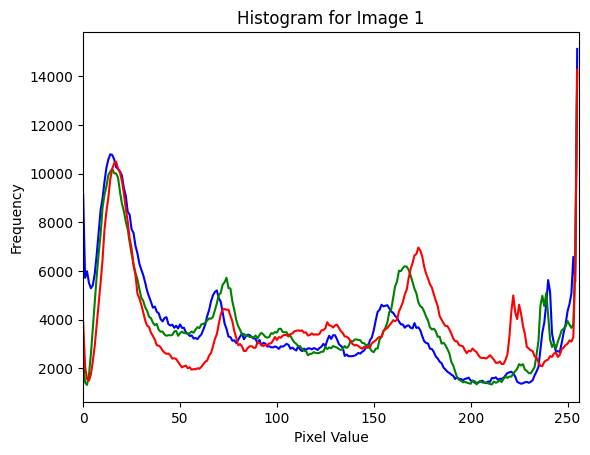

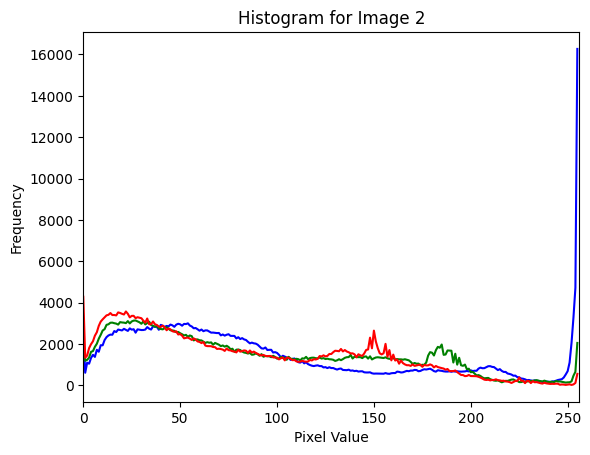

In [10]:
# Load images using OpenCV (Make sure to upload your images to Colab)
image1_path = '/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign5/OpenCVAndDeepLearning 1.jpg'  # Replace with the path to your first image
image2_path = '/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign5/OpenCVAndDeepLearning 2.jpg'  # Replace with the path to your second image

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Plot histograms for both images using OpenCV
plot_histogram(image1, 'Histogram for Image 1')
plot_histogram(image2, 'Histogram for Image 2')

## 4: Function for Face Detection Using Haar Cascades

In [11]:
def detect_faces_haar(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Initialize Haar Cascade
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    return image

## 5: Apply Haar Cascade Face Detection and Display Results

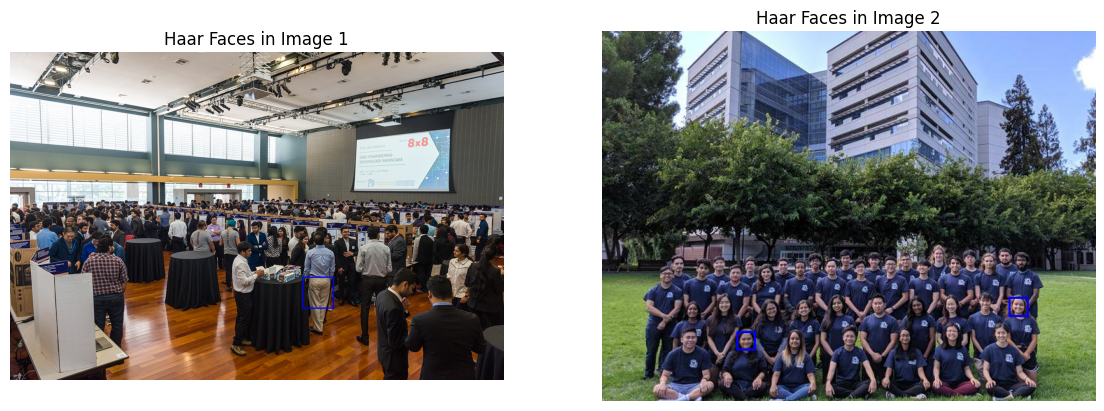

In [12]:
# Detect faces in the images
image1_faces_haar = detect_faces_haar(image1.copy())
image2_faces_haar = detect_faces_haar(image2.copy())

# Convert BGR to RGB for displaying
image1_faces_haar_rgb = cv2.cvtColor(image1_faces_haar, cv2.COLOR_BGR2RGB)
image2_faces_haar_rgb = cv2.cvtColor(image2_faces_haar, cv2.COLOR_BGR2RGB)

# Display the images with detected faces
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(image1_faces_haar_rgb)
plt.title('Haar Faces in Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_faces_haar_rgb)
plt.title('Haar Faces in Image 2')
plt.axis('off')

plt.show()

# Deep Learning

## 6: Install MTCNN for Deep Learning Face Detection

In [13]:
!pip install mtcnn

## 7: Import MTCNN Library

In [14]:
from mtcnn.mtcnn import MTCNN

## 8: Function for Face Detection Using MTCNN

In [15]:
def detect_faces_mtcnn(image):
    # Initialize MTCNN detector
    detector = MTCNN()
    # Detect faces
    results = detector.detect_faces(image)
    # Draw rectangles around detected faces
    for result in results:
        x, y, width, height = result['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 155, 255), 2)
    return image

## 9: Apply MTCNN Face Detection and Display Results

4/4 [==============================] - 0s 36ms/step


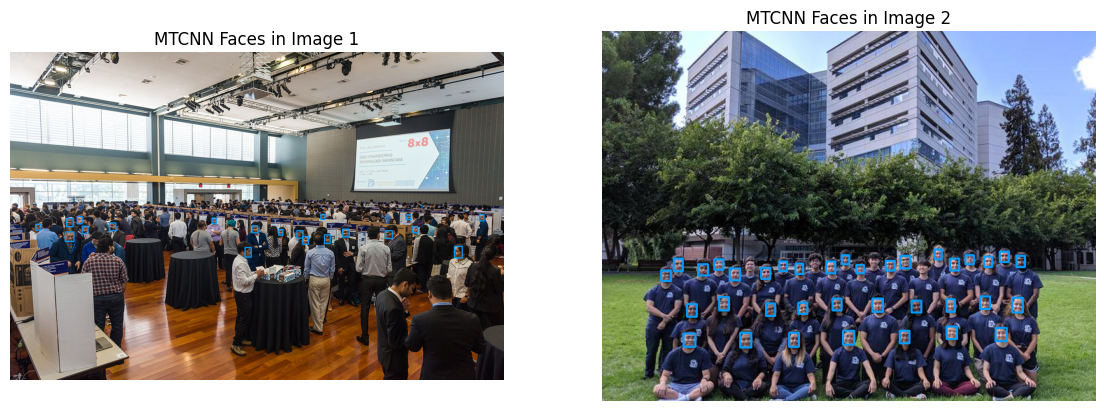

In [17]:
# Detect faces using MTCNN
image1_faces_mtcnn = detect_faces_mtcnn(image1_rgb.copy())
image2_faces_mtcnn = detect_faces_mtcnn(image2_rgb.copy())

# Display the images with detected faces using MTCNN
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(image1_faces_mtcnn)
plt.title('MTCNN Faces in Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2_faces_mtcnn)
plt.title('MTCNN Faces in Image 2')
plt.axis('off')

plt.show()